# Welcome to your first assignment!

Instructions are below. Please give this a try, and look in the solutions folder if you get stuck (or feel free to ask me!)

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../resources.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#f71;">Just before we get to the assignment --</h2>
            <span style="color:#f71;">I thought I'd take a second to point you at this page of useful resources for the course. This includes links to all the slides.<br/>
            <a href="https://edwarddonner.com/2024/11/13/llm-engineering-resources/">https://edwarddonner.com/2024/11/13/llm-engineering-resources/</a><br/>
            Please keep this bookmarked, and I'll continue to add more useful links there over time.
            </span>
        </td>
    </tr>
</table>

# HOMEWORK EXERCISE ASSIGNMENT

Upgrade the day 1 project to summarize a webpage to use an Open Source model running locally via Ollama rather than OpenAI

You'll be able to use this technique for all subsequent projects if you'd prefer not to use paid APIs.

**Benefits:**
1. No API charges - open-source
2. Data doesn't leave your box

**Disadvantages:**
1. Significantly less power than Frontier Model

## Recap on installation of Ollama

Simply visit [ollama.com](https://ollama.com) and install!

Once complete, the ollama server should already be running locally.  
If you visit:  
[http://localhost:11434/](http://localhost:11434/)

You should see the message `Ollama is running`.  

If not, bring up a new Terminal (Mac) or Powershell (Windows) and enter `ollama serve`  
And in another Terminal (Mac) or Powershell (Windows), enter `ollama pull llama3.2`  
Then try [http://localhost:11434/](http://localhost:11434/) again.

If Ollama is slow on your machine, try using `llama3.2:1b` as an alternative. Run `ollama pull llama3.2:1b` from a Terminal or Powershell, and change the code below from `MODEL = "llama3.2"` to `MODEL = "llama3.2:1b"`

In [1]:
# imports

import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display

In [9]:
# Constants

OLLAMA_API = "http://localhost:11434/api/chat"
HEADERS = {"Content-Type": "application/json"}
MODEL = "llama3.2"

In [3]:
# Create a messages list using the same format that we used for OpenAI

messages = [
    {"role": "user", "content": "Describe some of the business applications of Generative AI"}
]

In [4]:
payload = {
        "model": MODEL,
        "messages": messages,
        "stream": False
    }

In [5]:
response = requests.post(OLLAMA_API, json=payload, headers=HEADERS)
# print(response.json()['message']['content'])

KeyError: 'message'

In [6]:
response = response.json()

In [7]:
response.keys()

dict_keys(['error'])

# Introducing the ollama package

And now we'll do the same thing, but using the elegant ollama python package instead of a direct HTTP call.

Under the hood, it's making the same call as above to the ollama server running at localhost:11434

In [10]:
import ollama

response = ollama.chat(model=MODEL, messages=messages)
print(response['message']['content'])

ResponseError: model "llama3.2" not found, try pulling it first

## Alternative approach - using OpenAI python library to connect to Ollama

In [12]:
# There's actually an alternative approach that some people might prefer
# You can use the OpenAI client python library to call Ollama:

# from openai import OpenAI
# ollama_via_openai = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')

# response = ollama_via_openai.chat.completions.create(
#     model=MODEL,
#     messages=messages
# )

# print(response.choices[0].message.content)

# NOW the exercise for you

Take the code from day1 and incorporate it here, to build a website summarizer that uses Llama 3.2 running locally instead of OpenAI; use either of the above approaches.

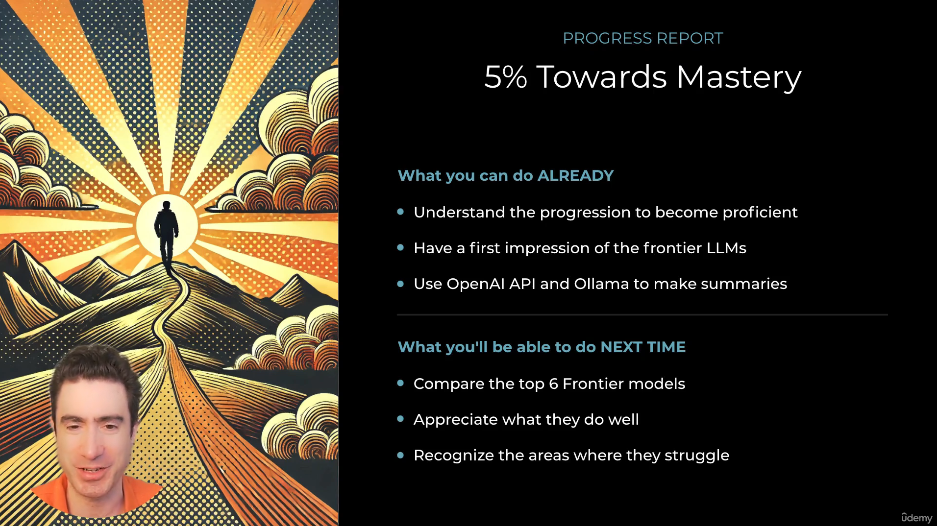

In [13]:
from IPython.display import Markdown, display, Image
Image("../1. Images/Recap - 1_2.png")